Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Mar2019**, Austin T. Rotker **Aug2019**

# 05. Two-Temperature Boiling Water Reactor Example B
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Condenser Malfunction Results](#res1)
* [Reactor Shutdown Results](#res2)

---

## Objectives<a id="obj"></a>
+ Use one-group energy, two-temperature, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity of a Boiling Water Reactor during shutdown and condenser malfunctions.
+ Explore and understand intrinsic temperature reactivity coefficient feedback from nuclear sources.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBv2jF8UDQvRb5l5Z2D5ssag?e=FDeSpV).

Refer to Notebook 03.


## Problem Statement<a id="ps"></a>

Consider a high temperature gas cooled reactor, with UO$_2$ fuel and a graphite moderator.
Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.

![](images/point-reactor-hx.png)

The below functions are used to import the functions written in 05-bwr-two-temperature-pt-reactor-A for the sake of simplicity. They are taken from https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html.

In [1]:
!pip install iapws




You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [5]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [35]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


importing Jupyter notebook from 05-bwr-two-temperature-pt-reactor-A.ipynb
You should consider upgrading via the 'pip install --upgrade pip' command.
done
        time        n      c_1      c_2      c_3      c_4      c_5      c_6  \
0   0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
1   2.40e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
2   4.81e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
3   7.21e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
4   9.62e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
5   1.20e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
6   1.44e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
7   1.68e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
8   1.92e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
9   2.16e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+0

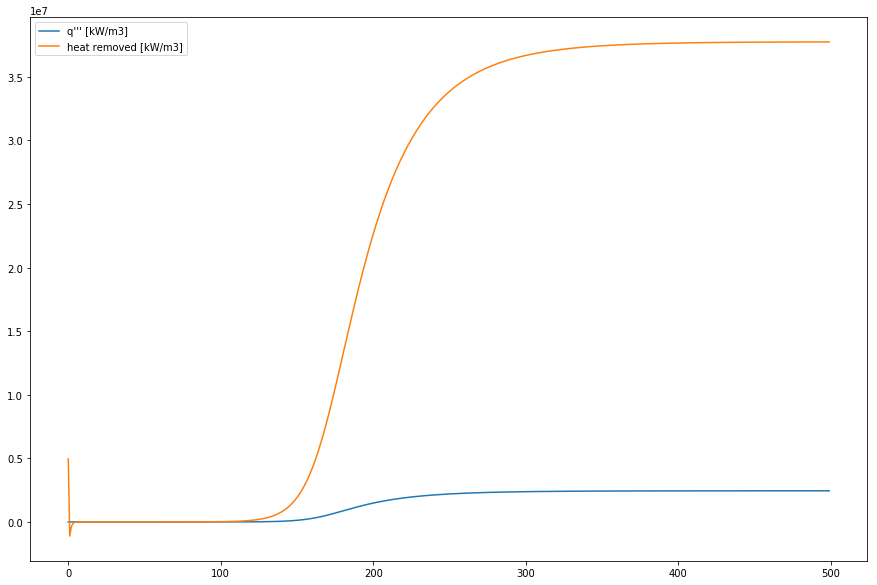

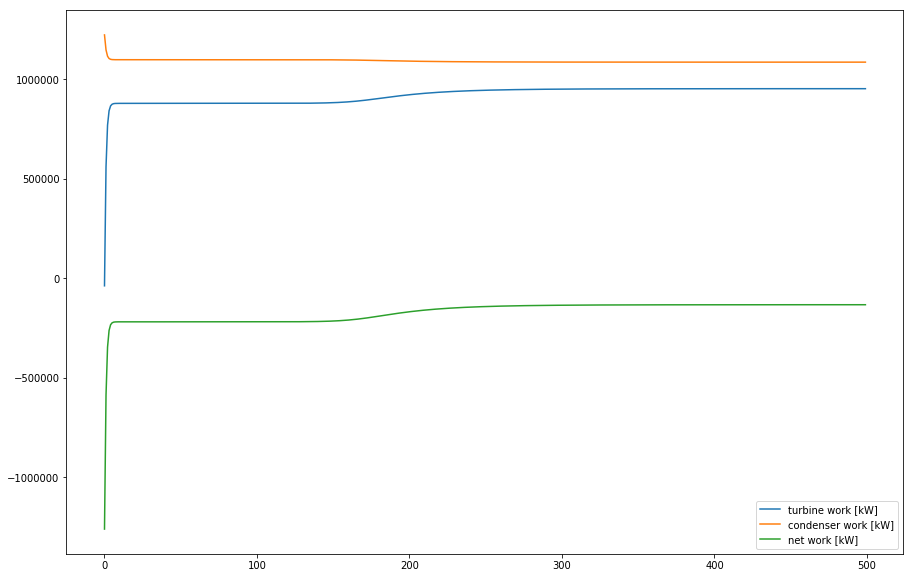

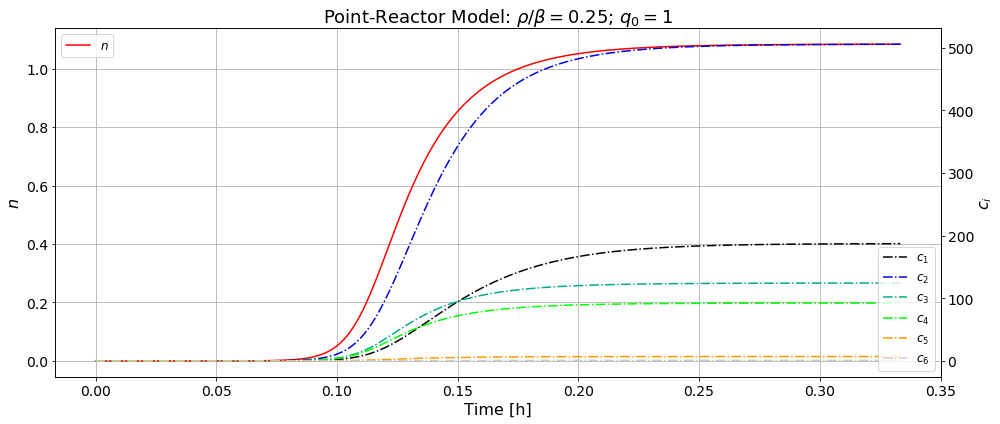

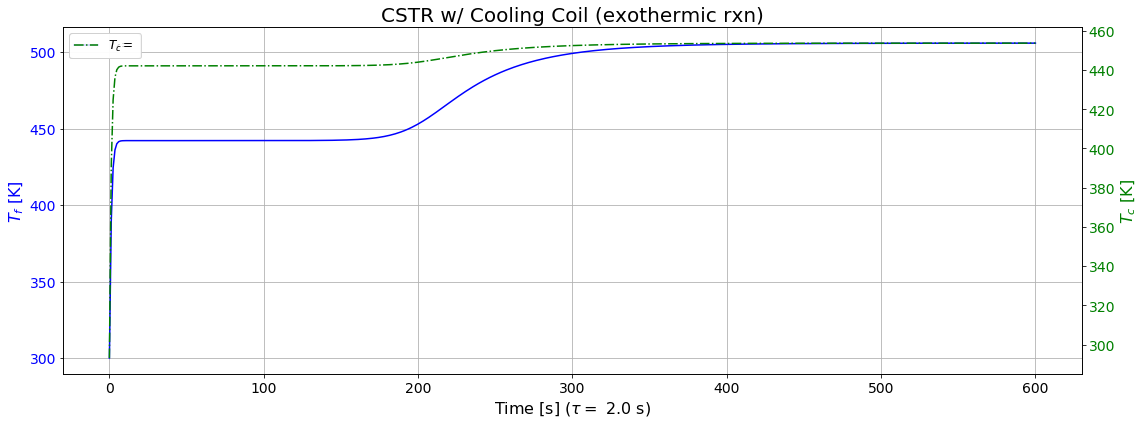

AttributeError: module '05-bwr-two-temperature-pt-reactor-A' has no attribute 'PressureCalc'

In [36]:
loader = NotebookLoader()
reactor = loader.load_module("05-bwr-two-temperature-pt-reactor-A")
reactor.PressureCalc(45)

<a id="res1"></a>
# Steady State Reactor Startup Followed By Condenser Malfunction
The reactor is started up as normal, and some time is allowed to pass with the reactor functioning at steady state. After this time has passed, the condenser experiences a malfunction wherein the degree of subcooling of the liquid leaving the condenser is decreased for a period of time, leading to an increase in reactor operating temperatures.

In [16]:
'''Setup up initial conditions'''

import numpy as np

reactor.params['malfunction start'] = 1300 # malfunction starts at 1300 seconds and ends at 2000 seconds
reactor.params['malfunction end'] = 2000
reactor.params['breakage start'] = 3001
reactor.params['breakage end'] = 0
reactor.params['malfunction subcooling'] = 1
reactor.params['shutdown time'] = 20000

reactor.gen_time = reactor.params['gen_time'] # retrieve neutron generation time
reactor.params['q_0'] = 1

reactor.params['n_ss'] = 0 # neutronless steady state before start up

reactor.rho_0_over_beta = 0.25 # $

reactor.beta = reactor.params['beta'] # retrieve the delayed neutron fraction
reactor.params['reactivity'] = reactor.rho_0_over_beta * reactor.beta # "rho/beta = 10 cents"

reactor.params['temp_0'] = reactor.params['temp_o']

reactor.params['tau_fake'] = 2 # s



# setup remaining initial conditions
reactor.setup_initial_conditions(reactor.params)

In [17]:
'''Evolve the point-reactor'''

time_final    = 3000# 450 # s
n_time_stamps = 1000 # number of solution values in time

reactor.params['time_final']    = time_final
reactor.params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
reactor.u_vec_history = reactor.run_point_reactor( reactor.f_vec, reactor.params )
#print(u_vec_history)
print("done")

done


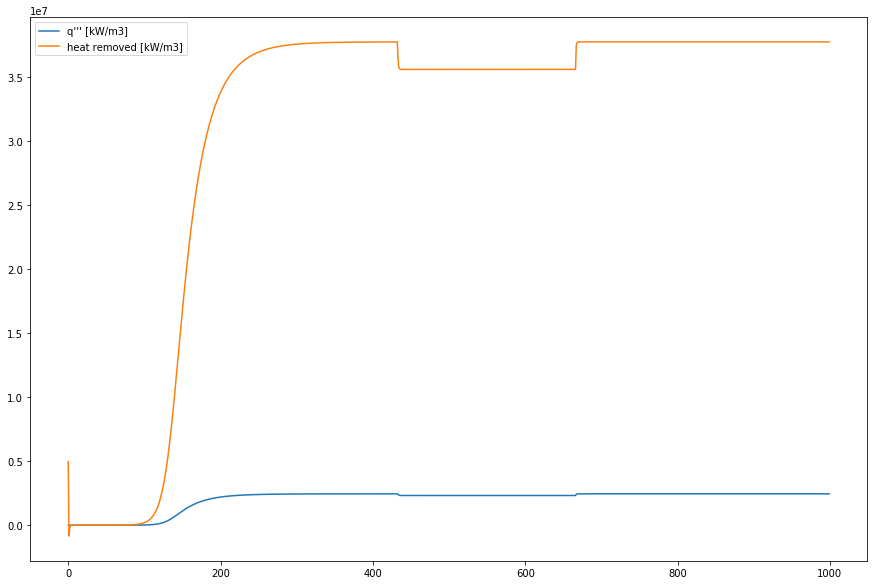

In [19]:
#plot the q3prime and heat removed data
heat_data = reactor.quantities1(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)


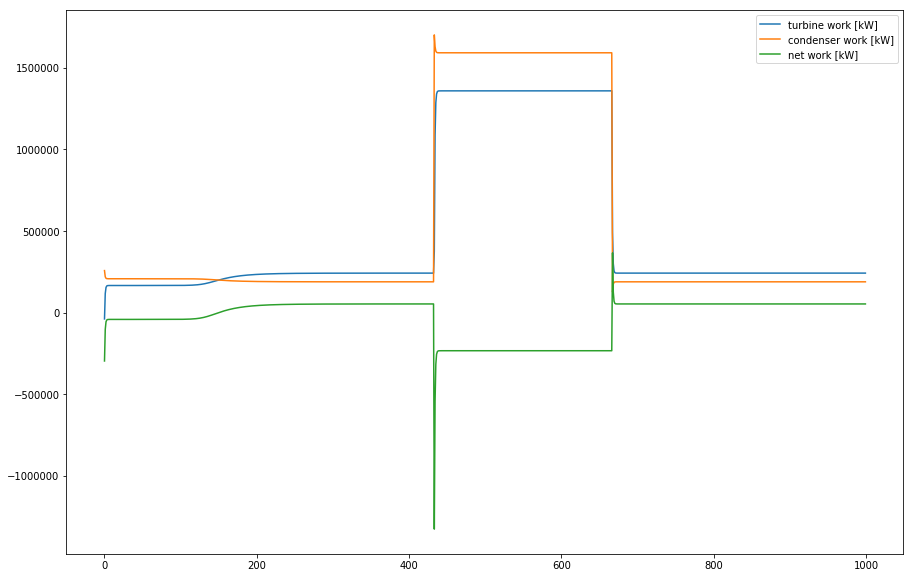

In [25]:
# plot the BOP work done
work_data = reactor.quantities2(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

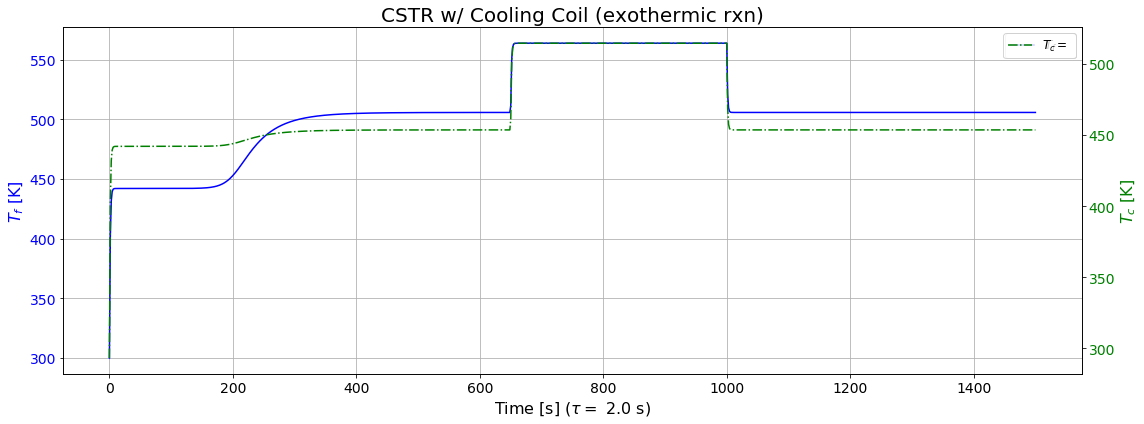

In [21]:
reactor.tmp()

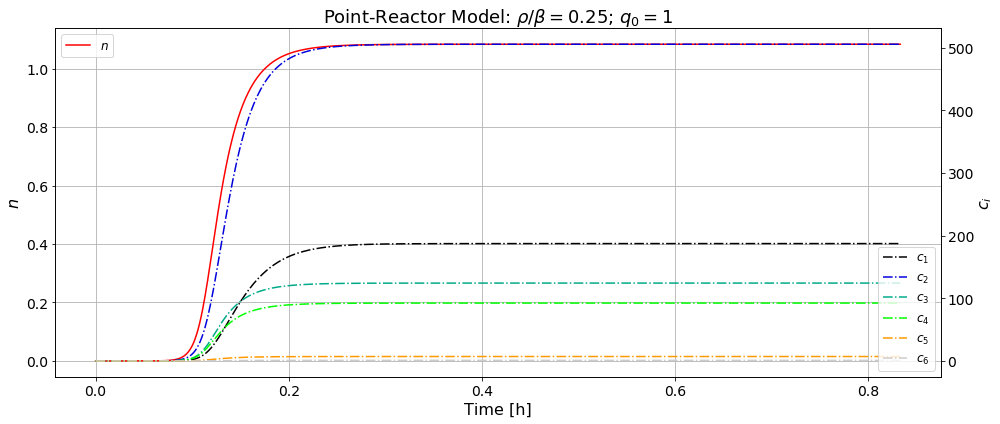

In [23]:
reactor.plot_results(reactor.u_vec_history, normalize=False)

<a id="res2"></a>
# Shutdown
The reactor starts up as normal, operates for a certain period of time at steady state, and then shuts down to zero power.

In [24]:
'''Setup up initial conditions'''

import numpy as np

reactor.params['malfunction start'] = 13000 # malfunction starts at 1300 seconds and ends at 2000 seconds
reactor.params['malfunction end'] = 0
reactor.params['breakage start'] = 13000
reactor.params['breakage end'] = 0
reactor.params['shutdown time'] = 2000

reactor.gen_time = reactor.params['gen_time'] # retrieve neutron generation time
reactor.params['q_0'] = 1

reactor.params['n_ss'] = 0 # neutronless steady state before start up

reactor.rho_0_over_beta = 0.25 # $

reactor.beta = reactor.params['beta'] # retrieve the delayed neutron fraction
reactor.params['reactivity'] = reactor.rho_0_over_beta * reactor.beta # "rho/beta = 10 cents"

reactor.params['temp_0'] = reactor.params['temp_o']

reactor.params['tau_fake'] = 2 # s


# setup remaining initial conditions
reactor.setup_initial_conditions(reactor.params)

In [25]:
'''Evolve the point-reactor'''

time_final    = 12000 # 450 # s
n_time_stamps = 1000 # number of solution values in time

reactor.params['time_final']    = time_final
reactor.params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
reactor.u_vec_history = reactor.run_point_reactor( reactor.f_vec, reactor.params )
#print(u_vec_history)
print("done")

done


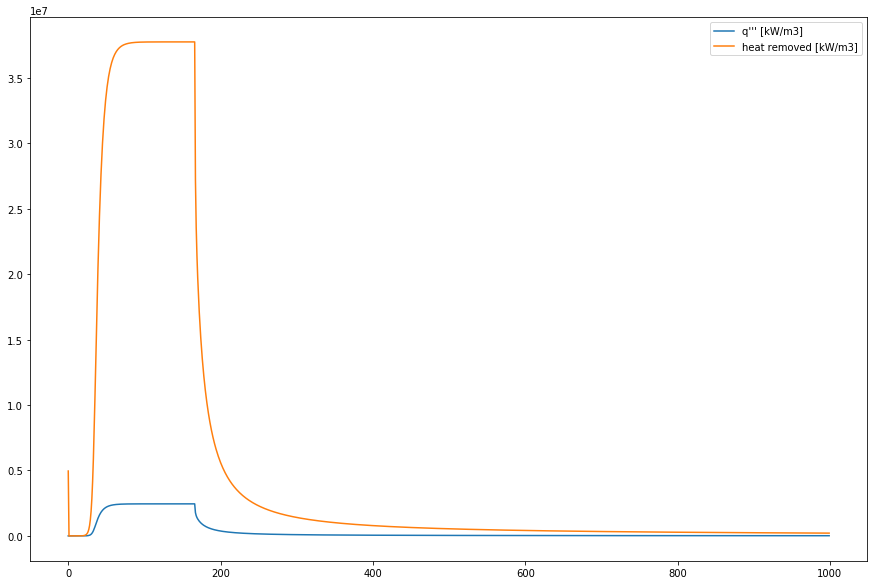

In [26]:
#plot the q3prime and heat removed data
heat_data = reactor.quantities1(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

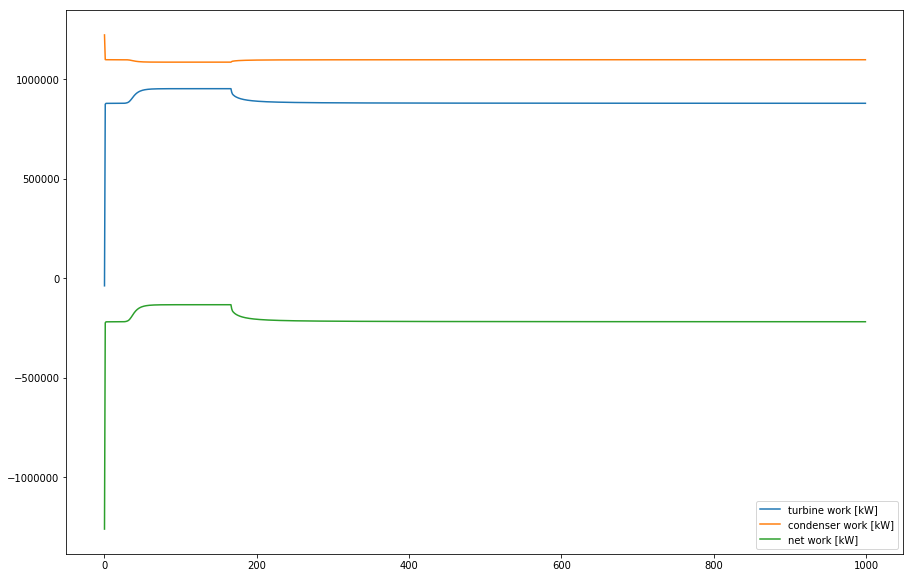

In [27]:
# plot the BOP work done
work_data = reactor.quantities2(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

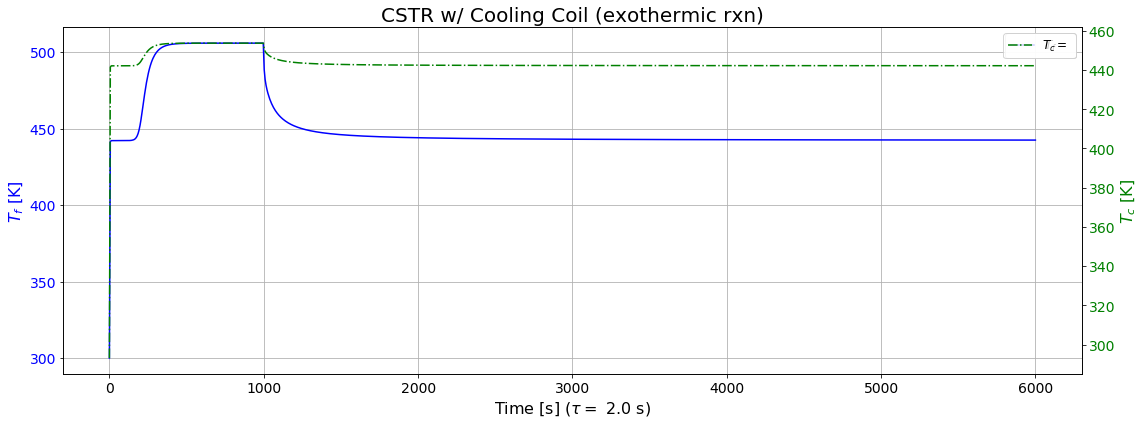

In [28]:
reactor.tmp()

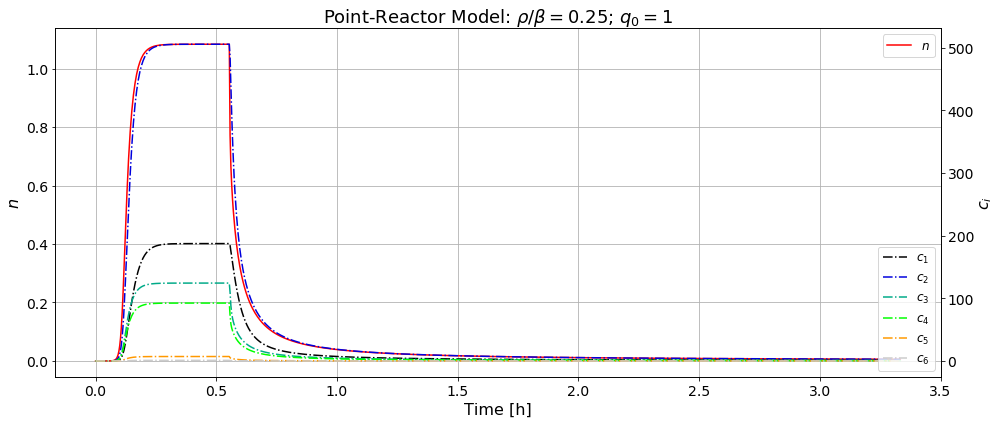

In [29]:
reactor.plot_results(reactor.u_vec_history, normalize=False)